<a href="https://colab.research.google.com/github/Sneha0948/BrainTumorSegmentation/blob/main/Brain_Tumor_Project_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G  108G  4.0K 100% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  160K  6.4G   1% /var/colab
/dev/sda1       114G  109G  5.3G  96% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!rm -rf /content/*


In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec 23 09:02 .
drwx------ 1 root root 4096 Dec 23 09:02 ..
-rw------- 1 root root   66 Dec 23 09:02 kaggle.json


In [3]:
!kaggle datasets list

ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000          16387        421  1.0              
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114         76  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        145  1.0          

In [4]:
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation


Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
 99% 4.14G/4.16G [00:57<00:00, 245MB/s]
100% 4.16G/4.16G [00:57<00:00, 78.2MB/s]


In [5]:
!unzip -q "brats20-dataset-training-validation.zip" -d "/content/brats20/"


In [6]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   66G   43G  61% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  116K  6.4G   1% /var/colab
/dev/sda1       114G   67G   48G  59% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  175M   15G   2% /content/drive


In [7]:
import os

os.listdir('/content/brats20')

['BraTS2020_TrainingData', 'BraTS2020_ValidationData']

In [8]:
import os

sample = '/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001'
os.listdir(sample)

['BraTS20_Training_001_t2.nii',
 'BraTS20_Training_001_seg.nii',
 'BraTS20_Training_001_t1ce.nii',
 'BraTS20_Training_001_t1.nii',
 'BraTS20_Training_001_flair.nii']

In [9]:
!pip install nibabel

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
path = '/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
img = nib.load(path).get_fdata()
img.shape

(240, 240, 155)

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

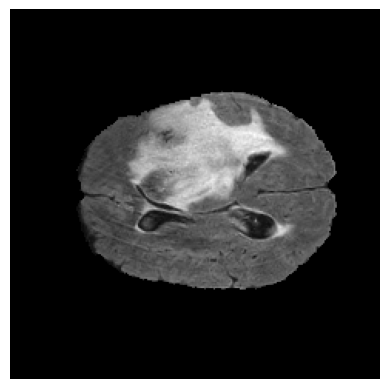

In [11]:
slice_index = 80
plt.imshow(img[:, :, slice_index], cmap='gray')
plt.axis('off')

In [12]:
DATA_DIR = "/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"


In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

case_path = os.path.join(DATA_DIR, "BraTS20_Training_001")

flair = nib.load(os.path.join(case_path, "BraTS20_Training_001_flair.nii")).get_fdata()
t1 = nib.load(os.path.join(case_path, "BraTS20_Training_001_t1.nii")).get_fdata()
t1ce = nib.load(os.path.join(case_path, "BraTS20_Training_001_t1ce.nii")).get_fdata()
t2 = nib.load(os.path.join(case_path, "BraTS20_Training_001_t2.nii")).get_fdata()
seg = nib.load(os.path.join(case_path, "BraTS20_Training_001_seg.nii")).get_fdata()


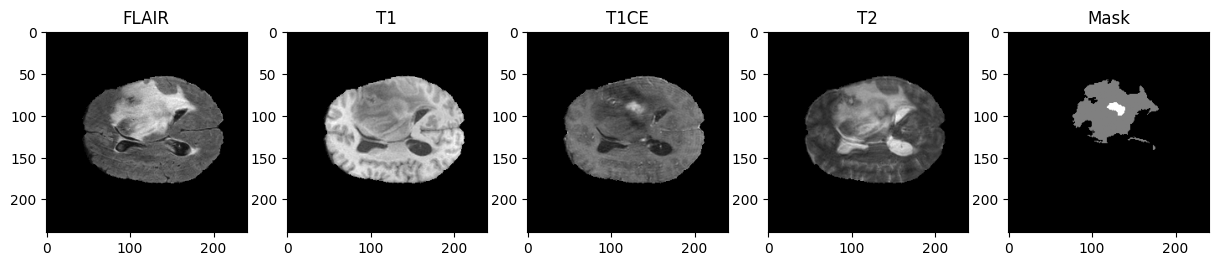

In [14]:
slice_idx = 80

plt.figure(figsize=(15,5))
plt.subplot(1, 5, 1); plt.imshow(flair[:,:,slice_idx], cmap='gray'); plt.title("FLAIR")
plt.subplot(1, 5, 2); plt.imshow(t1[:,:,slice_idx], cmap='gray'); plt.title("T1")
plt.subplot(1, 5, 3); plt.imshow(t1ce[:,:,slice_idx], cmap='gray'); plt.title("T1CE")
plt.subplot(1, 5, 4); plt.imshow(t2[:,:,slice_idx], cmap='gray'); plt.title("T2")
plt.subplot(1, 5, 5); plt.imshow(seg[:,:,slice_idx], cmap='gray'); plt.title("Mask")
plt.show()


In [15]:
def extract_slices(volume, mask):
    slices = []
    for i in range(volume.shape[2]):
        if np.max(mask[:,:,i]) > 0:   # skip empty slices
            slices.append(i)
    return slices


In [16]:
valid_slices = extract_slices(flair, seg)
print("Valid slices:", valid_slices[:10], "... total:", len(valid_slices))


Valid slices: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39] ... total: 83


In [17]:
import os

output_img_dir = "/content/2d_images"
output_mask_dir = "/content/2d_masks"

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)


In [18]:
def normalize(img):
    img = img.astype("float32")
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return img


In [20]:
import cv2
import numpy as np
import nibabel as nib

import glob

all_cases = sorted(glob.glob(os.path.join(DATA_DIR, "BraTS20_Training_*")))

count = 0

for case in all_cases:
    patient_id = os.path.basename(case)

    flair = nib.load(os.path.join(case, patient_id + "_flair.nii")).get_fdata()
    seg = nib.load(os.path.join(case, patient_id + "_seg.nii")).get_fdata()

    for i in range(seg.shape[2]):
        if np.max(seg[:,:,i]) > 0:  # slice must contain tumor

            img = normalize(flair[:,:,i])
            mask = seg[:,:,i]

            # save image
            cv2.imwrite(f"{output_img_dir}/{patient_id}_slice_{i}.png", (img*255).astype(np.uint8))

            # save mask
            cv2.imwrite(f"{output_mask_dir}/{patient_id}_slice_{i}.png", mask.astype(np.uint8))

            count += 1

count


24422

In [21]:
len(os.listdir("/content/2d_images"))


24422

In [22]:
len(os.listdir("/content/2d_masks"))


24422

In [23]:
files = sorted(os.listdir("/content/2d_images"))
files[-5:]


['BraTS20_Training_369_slice_95.png',
 'BraTS20_Training_369_slice_96.png',
 'BraTS20_Training_369_slice_97.png',
 'BraTS20_Training_369_slice_98.png',
 'BraTS20_Training_369_slice_99.png']

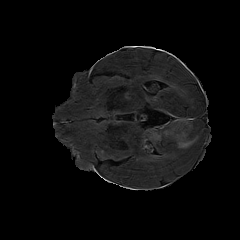

In [24]:
from PIL import Image
import random

img_name = random.choice(os.listdir("/content/2d_images"))
Image.open(f"/content/2d_images/{img_name}")


In [28]:
import cv2
import os

IMG_SIZE = 128

for img_name in os.listdir("/content/2d_images"):
    img_path = f"/content/2d_images/{img_name}"
    mask_path = f"/content/2d_masks/{img_name}"

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    cv2.imwrite(img_path, img)
    cv2.imwrite(mask_path, mask)


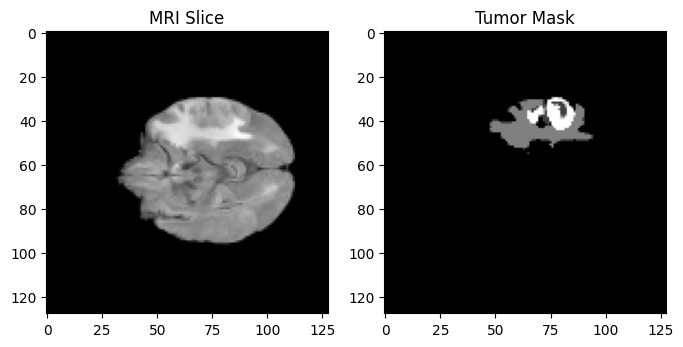

In [30]:
import matplotlib.pyplot as plt
import random
import os
import cv2

# Get a random image name from the directory
img_name_to_display = random.choice(os.listdir("/content/2d_images"))

img = cv2.imread(os.path.join("/content/2d_images", img_name_to_display), 0)
mask = cv2.imread(os.path.join("/content/2d_masks", img_name_to_display), 0)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("MRI Slice")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.title("Tumor Mask")
plt.imshow(mask, cmap="gray")

plt.show()